https://github.com/timeamagyar/kdd-cup-99-python/blob/master/kdd%20linear%20separability.ipynb

I am following the some steps in that notebook

professors reference: https://rawgit.com/mhahsler/Introduction_to_Data_Mining_R_Examples/master/chap2.html


The plots will need imported libraries to improve their look, that where a lot of coding time will go into

Downloaded the csv from: https://datahub.io/machine-learning/kddcup99

In [1]:
setwd("~/Development/Data_Mining/")

In [2]:
network_flows <- read.csv(file = 'kddcup99_zip/data/kddcup99_csv.csv')

In [3]:
head(network_flows)

duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,http,SF,181,5450,0,0,0,0,...,9,1,0,0.11,0,0,0,0,0,normal
0,tcp,http,SF,239,486,0,0,0,0,...,19,1,0,0.05,0,0,0,0,0,normal
0,tcp,http,SF,235,1337,0,0,0,0,...,29,1,0,0.03,0,0,0,0,0,normal
0,tcp,http,SF,219,1337,0,0,0,0,...,39,1,0,0.03,0,0,0,0,0,normal
0,tcp,http,SF,217,2032,0,0,0,0,...,49,1,0,0.02,0,0,0,0,0,normal
0,tcp,http,SF,217,2032,0,0,0,0,...,59,1,0,0.02,0,0,0,0,0,normal


In [4]:
summary(network_flows)

    duration        protocol_type     service            flag       
 Min.   :    0.00   icmp:283602   ecr_i   :281400   SF     :378439  
 1st Qu.:    0.00   tcp :190064   private :110893   S0     : 87007  
 Median :    0.00   udp : 20354   http    : 64292   REJ    : 26875  
 Mean   :   47.98                 smtp    :  9723   RSTR   :   903  
 3rd Qu.:    0.00                 other   :  7237   RSTO   :   579  
 Max.   :58329.00                 domain_u:  5863   SH     :   107  
                                  (Other) : 14612   (Other):   110  
   src_bytes           dst_bytes            land          wrong_fragment    
 Min.   :        0   Min.   :      0   Min.   :0.00e+00   Min.   :0.000000  
 1st Qu.:       45   1st Qu.:      0   1st Qu.:0.00e+00   1st Qu.:0.000000  
 Median :      520   Median :      0   Median :0.00e+00   Median :0.000000  
 Mean   :     3026   Mean   :    869   Mean   :4.45e-05   Mean   :0.006433  
 3rd Qu.:     1032   3rd Qu.:      0   3rd Qu.:0.00e+00   3rd Q

In [5]:
unique(network_flows["label"])

,label
1,normal
745,buffer_overflow
4050,loadmodule
4114,perl
7602,neptune
7794,smurf
15700,guess_passwd
15785,pod
19287,teardrop
22815,portsweep


In [6]:
lapply(network_flows, class)

$duration
[1] "integer"

$protocol_type
[1] "factor"

$service
[1] "factor"

$flag
[1] "factor"

$src_bytes
[1] "integer"

$dst_bytes
[1] "integer"

$land
[1] "integer"

$wrong_fragment
[1] "integer"

$urgent
[1] "integer"

$hot
[1] "integer"

$num_failed_logins
[1] "integer"

$logged_in
[1] "integer"

$lnum_compromised
[1] "integer"

$lroot_shell
[1] "integer"

$lsu_attempted
[1] "integer"

$lnum_root
[1] "integer"

$lnum_file_creations
[1] "integer"

$lnum_shells
[1] "integer"

$lnum_access_files
[1] "integer"

$lnum_outbound_cmds
[1] "integer"

$is_host_login
[1] "integer"

$is_guest_login
[1] "integer"

$count
[1] "integer"

$srv_count
[1] "integer"

$serror_rate
[1] "numeric"

$srv_serror_rate
[1] "numeric"

$rerror_rate
[1] "numeric"

$srv_rerror_rate
[1] "numeric"

$same_srv_rate
[1] "numeric"

$diff_srv_rate
[1] "numeric"

$srv_diff_host_rate
[1] "numeric"

$dst_host_count
[1] "integer"

$dst_host_srv_count
[1] "integer"

$dst_host_same_srv_rate
[1] "numeric"

$dst_host_diff_srv_rate
[1] "numeric"

$dst_host_same_src_port_rate
[1] "numeric"

$dst_host_srv_diff_host_rate
[1] "numeric"

$dst_host_serror_rate
[1] "numeric"

$dst_host_srv_serror_rate
[1] "numeric"

$dst_host_rerror_rate
[1] "numeric"

$dst_host_srv_rerror_rate
[1] "numeric"

$label
[1] "factor"

### Get numerical columns (necessary for correlation finding and normalization)

In [17]:
network_flows[sapply(network_flows,is.numeric)]

duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,181,5450,0,0,0,0,0,1,0,...,9,9,1,0,0.11,0.00,0,0,0,0
0,239,486,0,0,0,0,0,1,0,...,19,19,1,0,0.05,0.00,0,0,0,0
0,235,1337,0,0,0,0,0,1,0,...,29,29,1,0,0.03,0.00,0,0,0,0
0,219,1337,0,0,0,0,0,1,0,...,39,39,1,0,0.03,0.00,0,0,0,0
0,217,2032,0,0,0,0,0,1,0,...,49,49,1,0,0.02,0.00,0,0,0,0
0,217,2032,0,0,0,0,0,1,0,...,59,59,1,0,0.02,0.00,0,0,0,0
0,212,1940,0,0,0,0,0,1,0,...,1,69,1,0,1.00,0.04,0,0,0,0
0,159,4087,0,0,0,0,0,1,0,...,11,79,1,0,0.09,0.04,0,0,0,0
0,210,151,0,0,0,0,0,1,0,...,8,89,1,0,0.12,0.04,0,0,0,0
0,212,786,0,0,0,1,0,1,0,...,8,99,1,0,0.12,0.05,0,0,0,0


In [18]:
scaled_network_flow_stats <- scale(network_flows[sapply(network_flows,is.numeric)])

### Correlation table

In [19]:
cor(scaled_network_flow_stats)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.0000000000,4.258230e-03,5.439538e-03,-4.524034e-04,-0.0032350400,3.785996e-03,0.0132129218,5.238859e-03,-0.017264930,5.809502e-02,...,0.010073482,-0.117515703,-0.1184584906,0.4062326049,0.0426422925,-0.0069827401,-0.0304002747,-3.061242e-02,6.739129e-03,0.0104646044
src_bytes,0.0042582299,1.000000e+00,-1.596636e-06,-2.043195e-05,-0.0001390381,-5.013674e-06,0.0044828362,-2.739112e-05,0.001700673,1.185444e-04,...,-0.001742623,-0.003211957,-0.0020524837,0.0005780155,-0.0007237417,0.0011855334,-0.0007183140,1.122093e-03,-3.926928e-04,0.0013283564
dst_bytes,0.0054395379,-1.596636e-06,1.000000e+00,-1.754260e-04,-0.0012543574,1.628760e-02,0.0043654971,4.932992e-02,0.047814418,2.329795e-02,...,-0.048869298,-0.005849446,0.0070584821,-0.0053139411,-0.0201433157,0.0087065258,-0.0113337114,-1.123488e-02,-4.999610e-03,-0.0054708038
land,-0.0004524034,-2.043195e-05,-1.754260e-04,1.000000e+00,-0.0003184574,-1.716052e-05,-0.0002945380,-6.528074e-05,-0.002784078,-3.789631e-05,...,-0.023671069,-0.011587267,0.0019840594,-0.0003329561,0.0037986841,0.0833200533,0.0126576817,7.794680e-03,-1.510955e-03,-0.0016647810
wrong_fragment,-0.0032350400,-1.390381e-04,-1.254357e-03,-3.184574e-04,1.0000000000,-1.227112e-04,-0.0021061782,-4.668086e-04,-0.019908350,-2.709884e-04,...,-0.005191298,-0.058624424,-0.0549031480,0.0718570368,-0.0318028905,0.0120922958,-0.0190910681,-2.210415e-02,2.977393e-02,-0.0119044934
urgent,0.0037859962,-5.013674e-06,1.628760e-02,-1.716052e-05,-0.0001227112,1.000000e+00,0.0003562049,1.419964e-01,0.006163805,1.428464e-02,...,-0.007139441,-0.004540506,-0.0032788584,0.0105360472,-0.0020023946,-0.0004079110,-0.0011942378,-1.191113e-03,-6.481129e-04,-0.0006414901
hot,0.0132129218,4.482836e-03,4.365497e-03,-2.945380e-04,-0.0021061782,3.562049e-04,1.0000000000,8.740464e-03,0.105305710,7.348379e-03,...,-0.026367088,-0.038730580,-0.0291172262,0.0013190483,-0.0529230314,-0.0044673327,-0.0194906142,-2.020073e-02,-6.540761e-03,-0.0077486595
num_failed_logins,0.0052388586,-2.739112e-05,4.932992e-02,-6.528074e-05,-0.0004668086,1.419964e-01,0.0087404638,1.000000e+00,-0.001144606,6.907151e-03,...,-0.025444099,-0.015413066,0.0005068858,0.0010171626,-0.0095646071,0.0160006762,-0.0019453625,-2.452734e-03,2.475281e-02,0.0235843013
logged_in,-0.0172649298,1.700673e-03,4.781442e-02,-2.784078e-03,-0.0199083498,6.163805e-03,0.1053057096,-1.144606e-03,1.000000000,1.361180e-02,...,-0.621023346,0.119324263,0.1610802593,-0.0611503713,-0.4615554920,0.1404945382,-0.1909538810,-1.917028e-01,-9.086751e-02,-0.0878847267
lnum_compromised,0.0580950159,1.185444e-04,2.329795e-02,-3.789631e-05,-0.0002709884,1.428464e-02,0.0073483786,6.907151e-03,0.013611797,1.000000e+00,...,-0.008361065,-0.004797014,-0.0025840287,0.0003594461,-0.0067145572,0.0006211836,-0.0019783834,-1.630984e-03,-8.431406e-04,-0.0008729998


### Histograms for numerical data types (normalized)

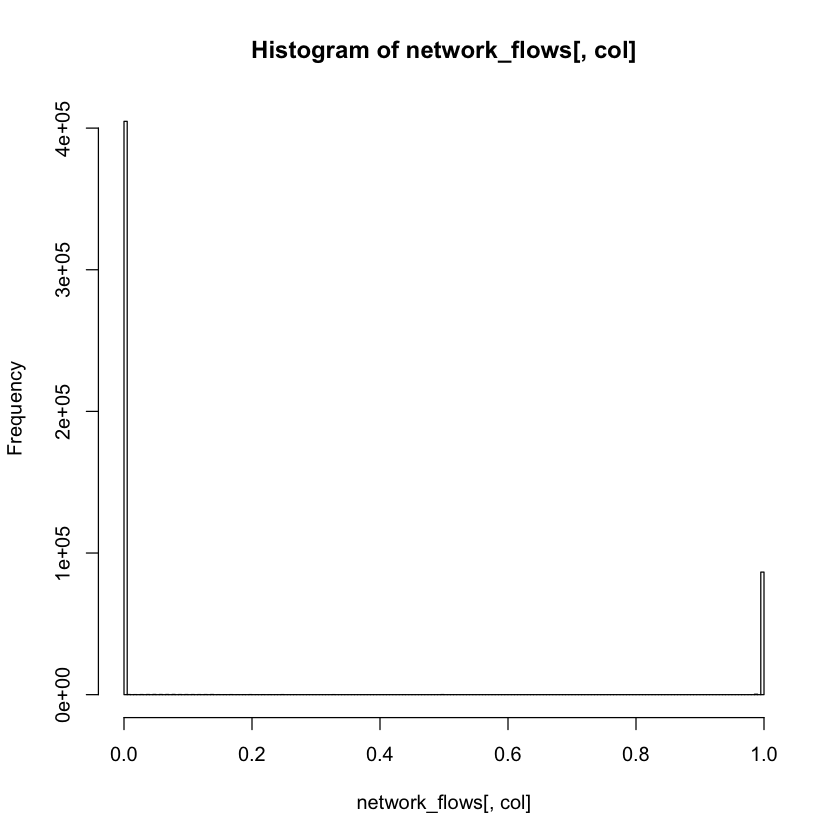

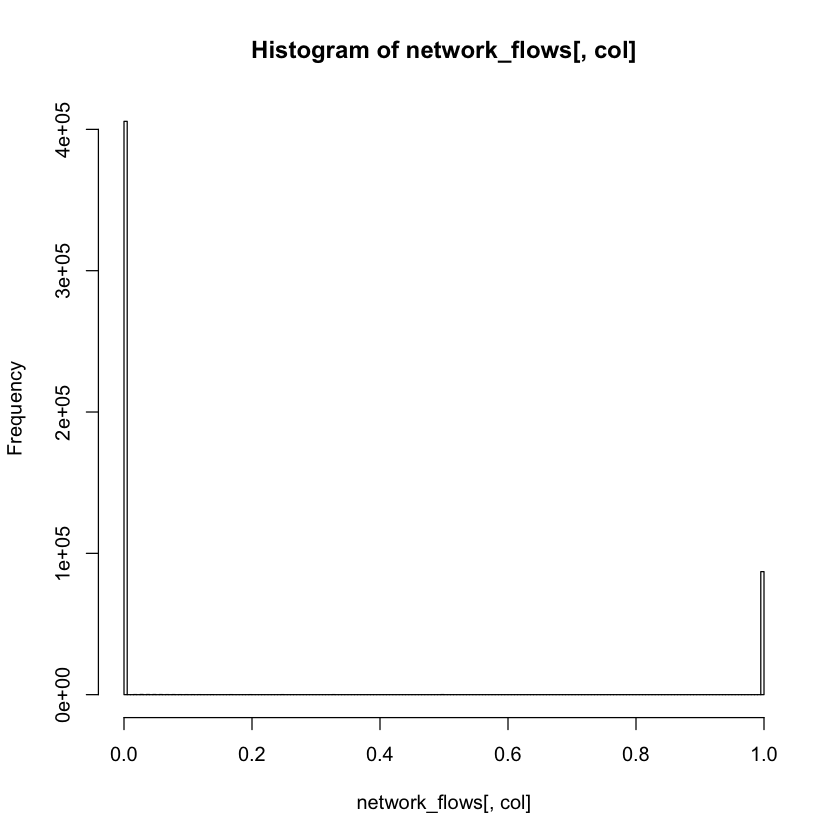

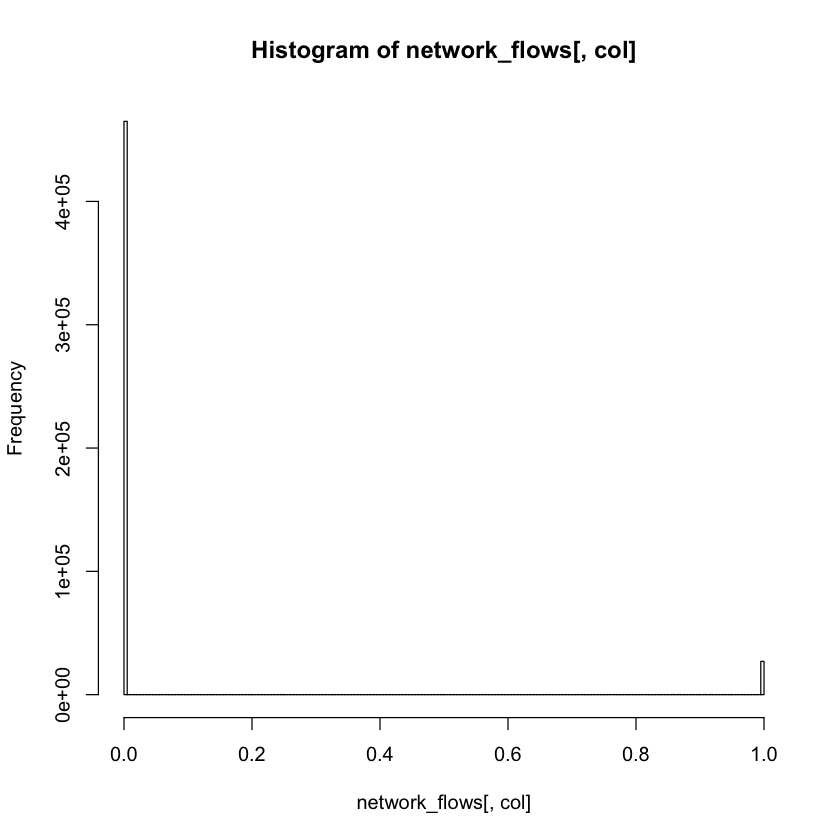

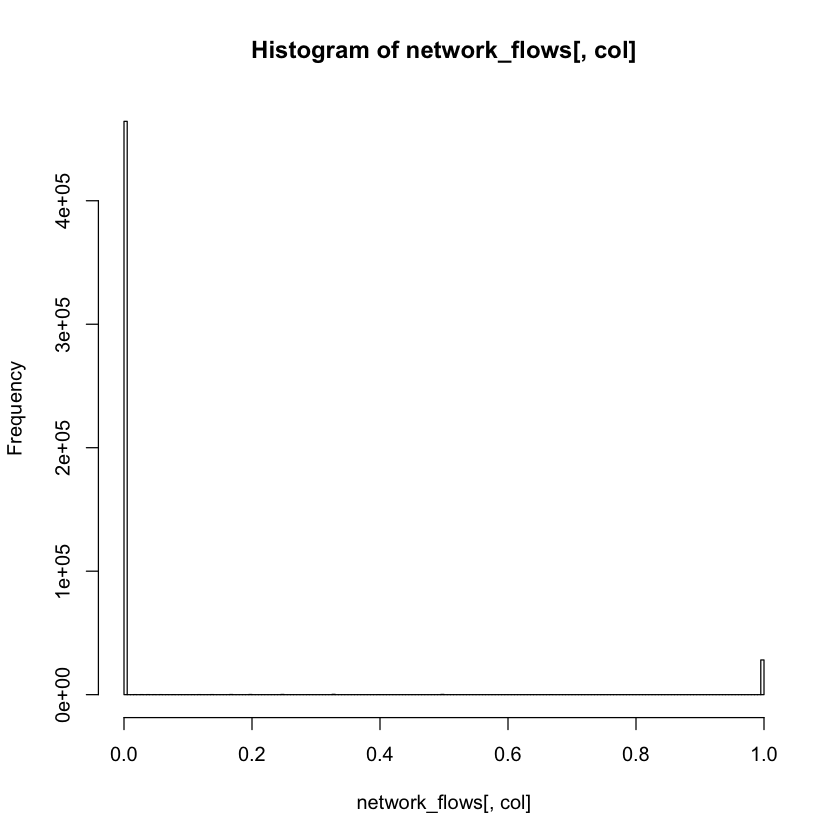

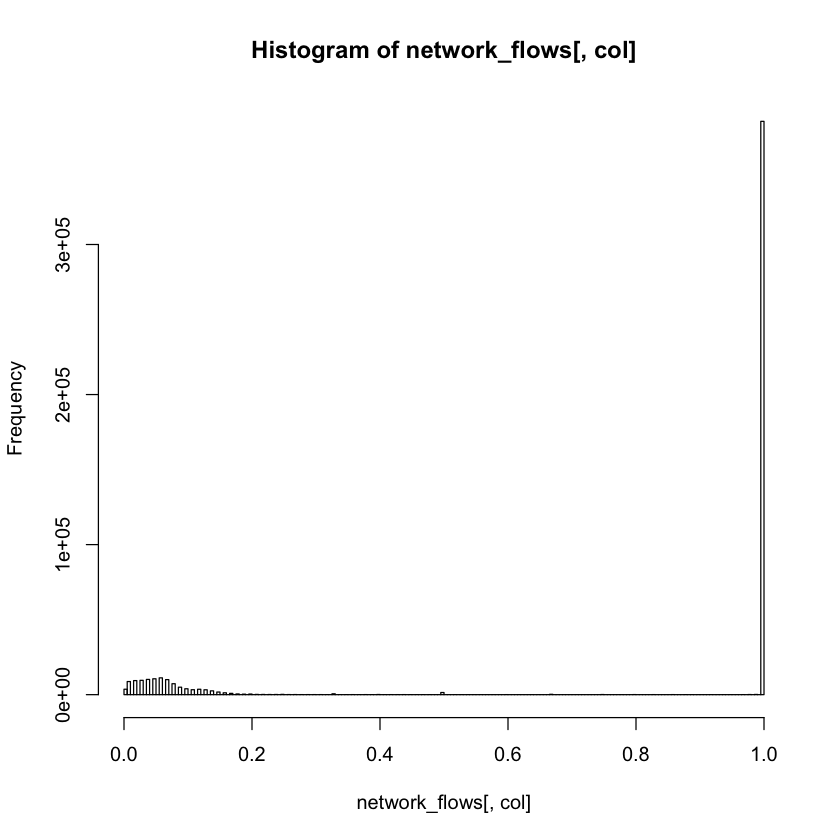

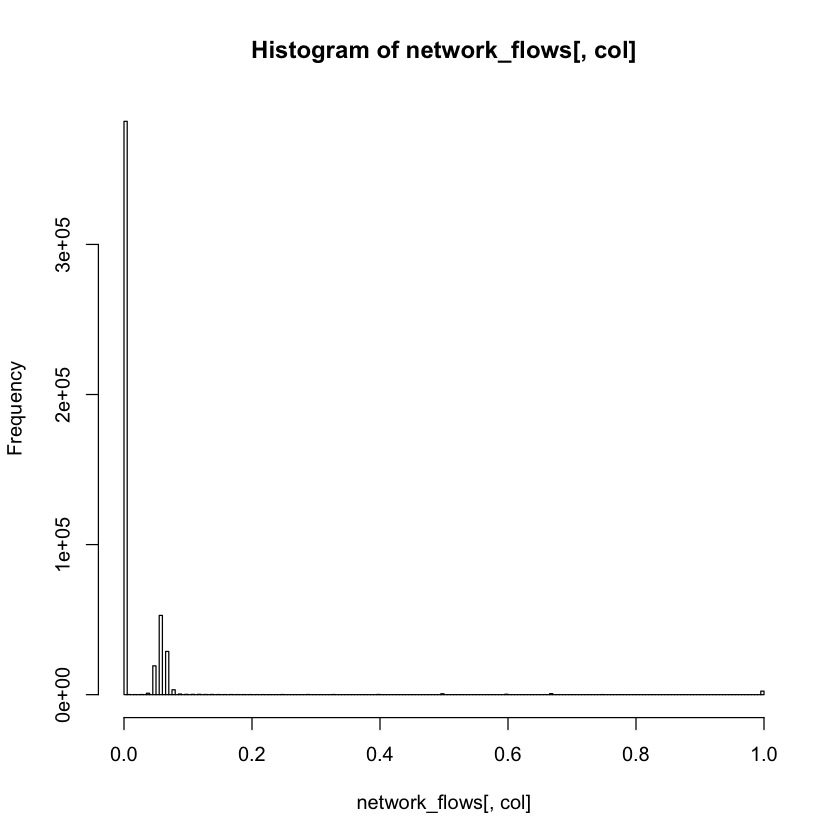

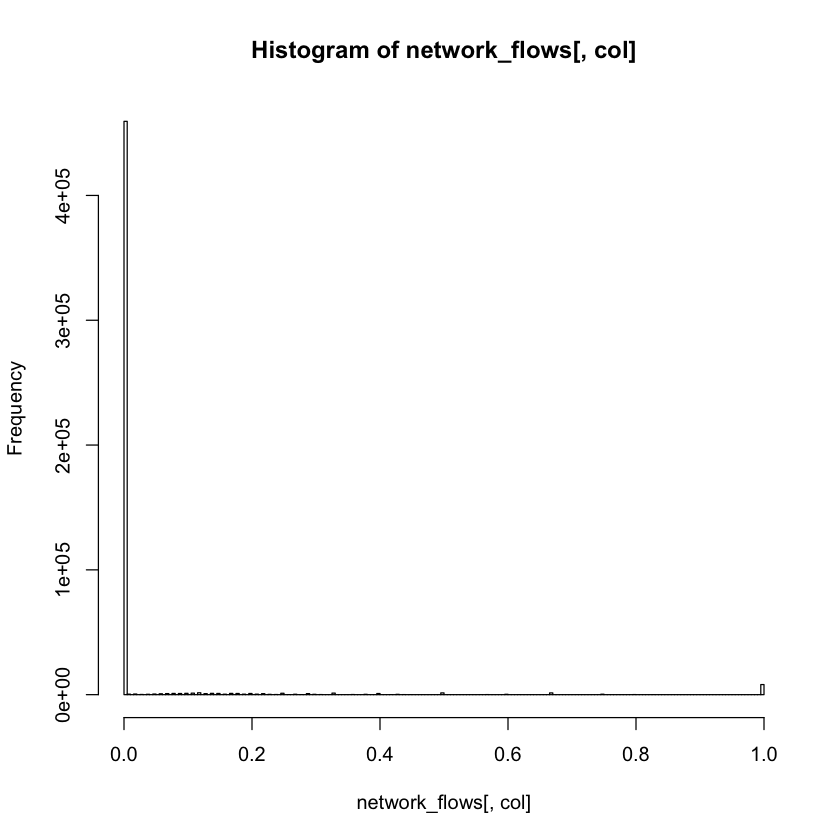

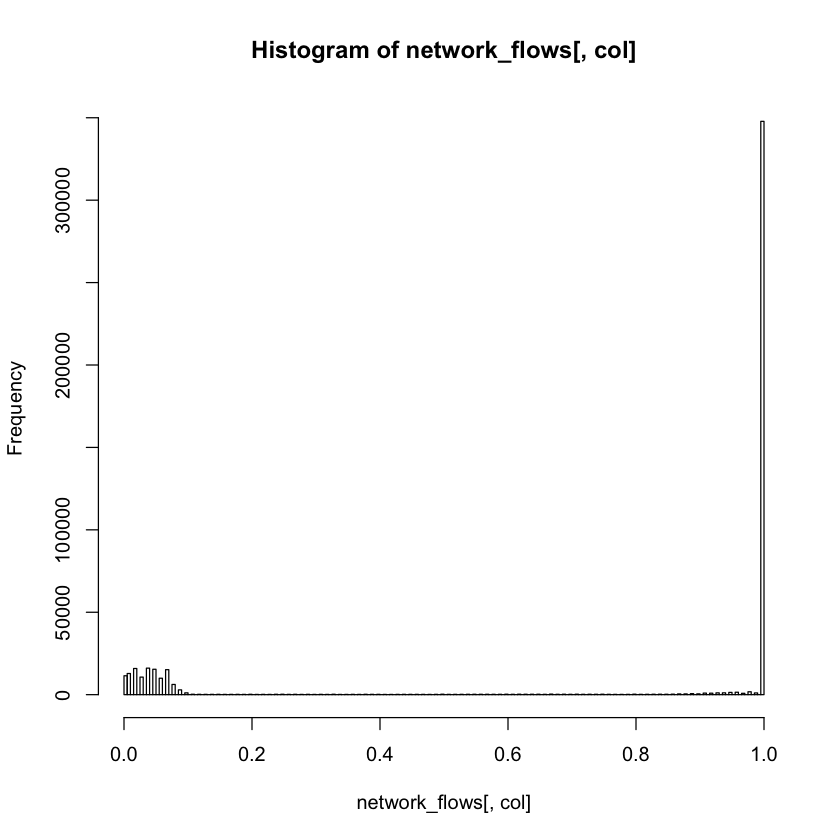

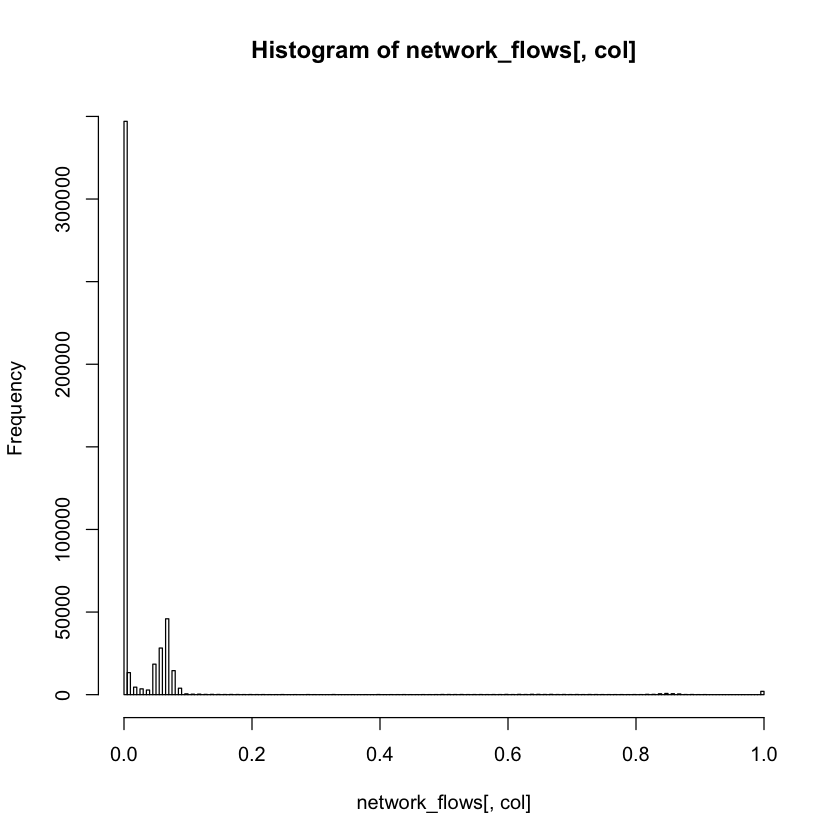

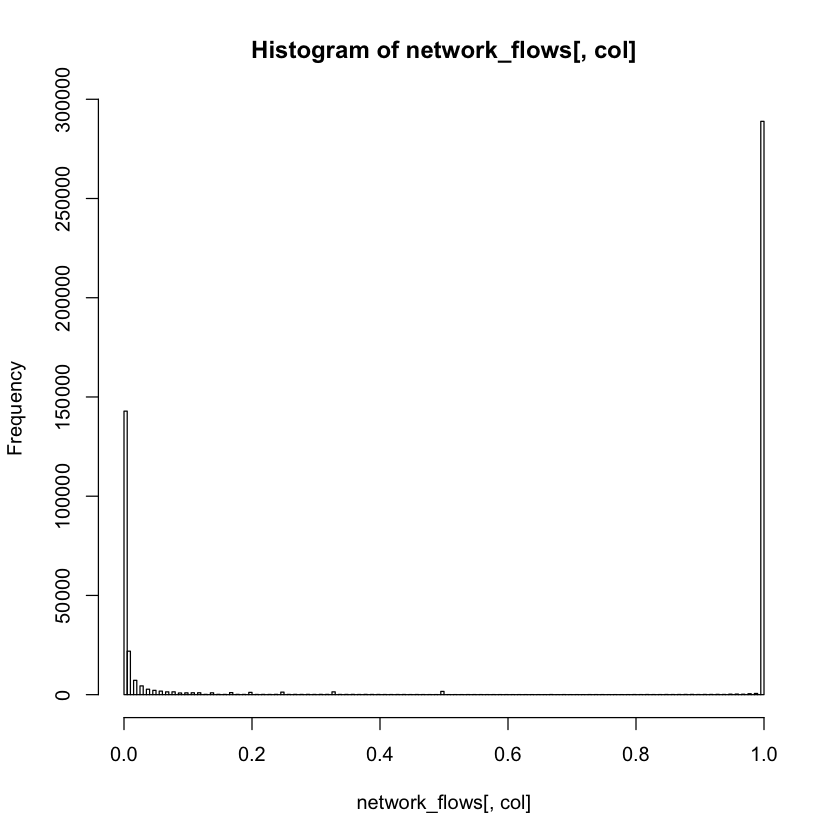

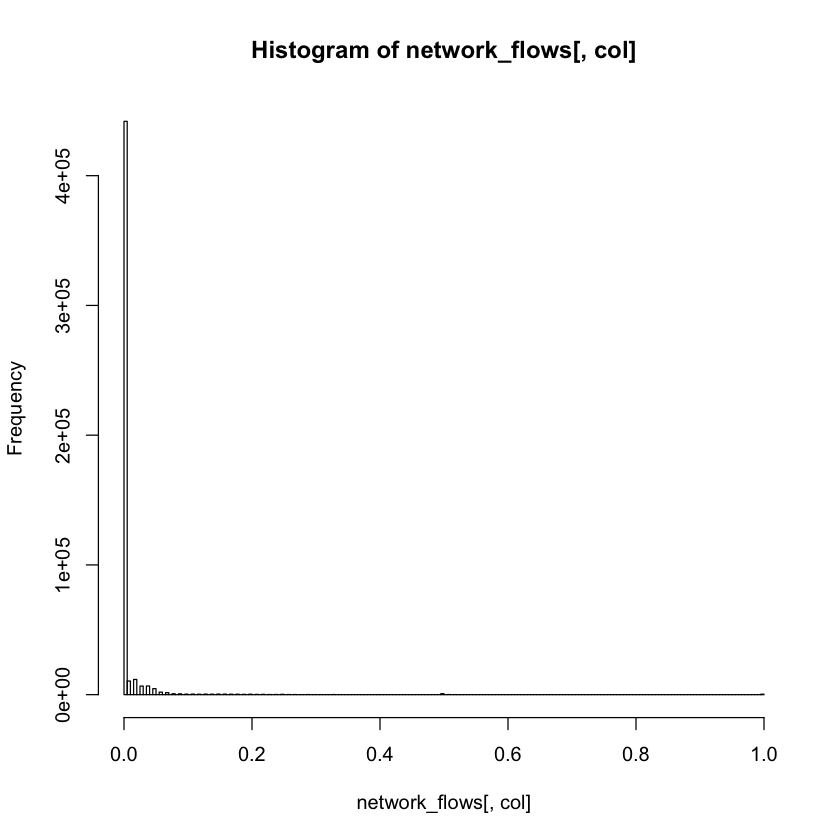

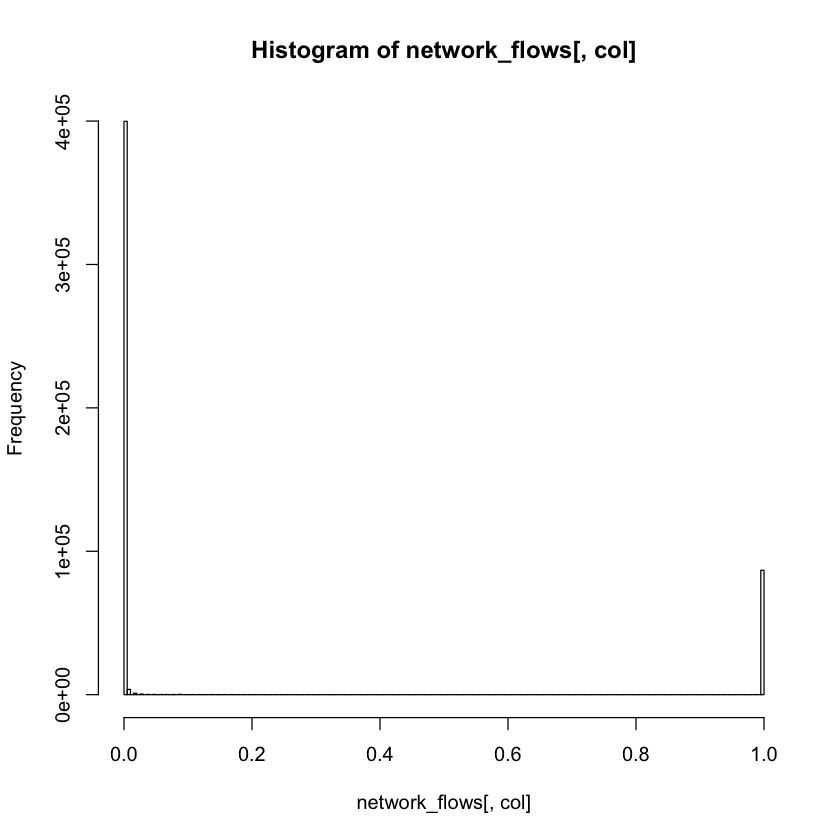

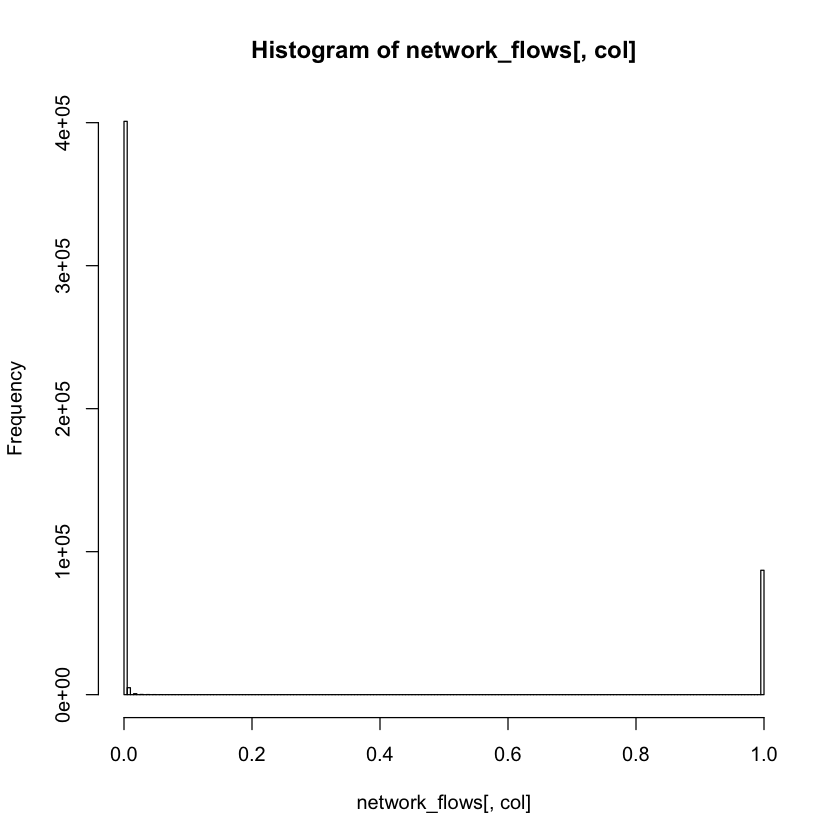

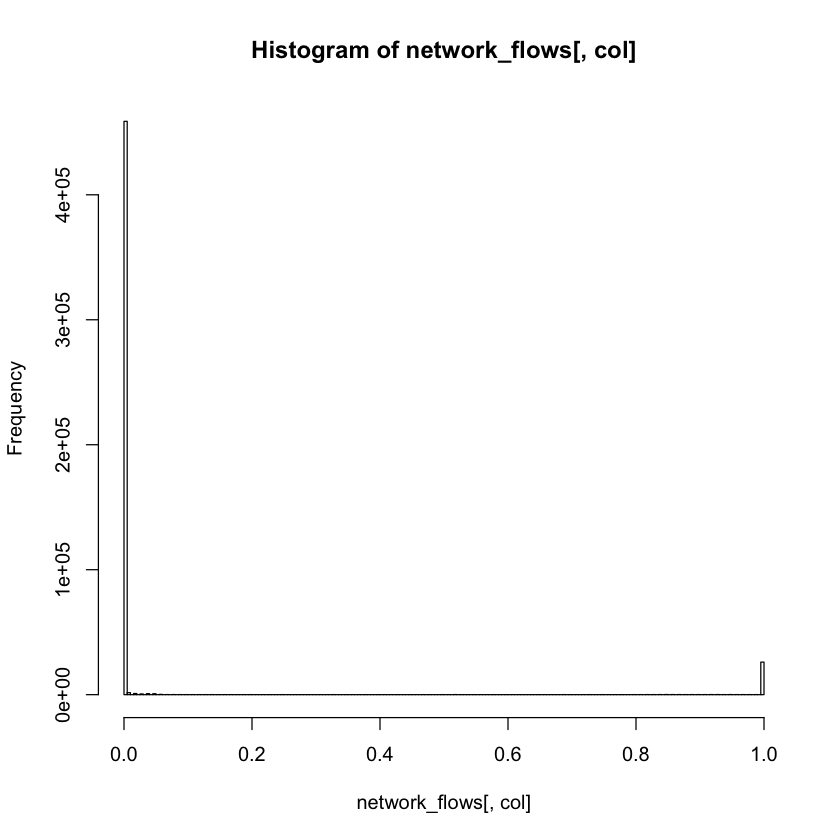

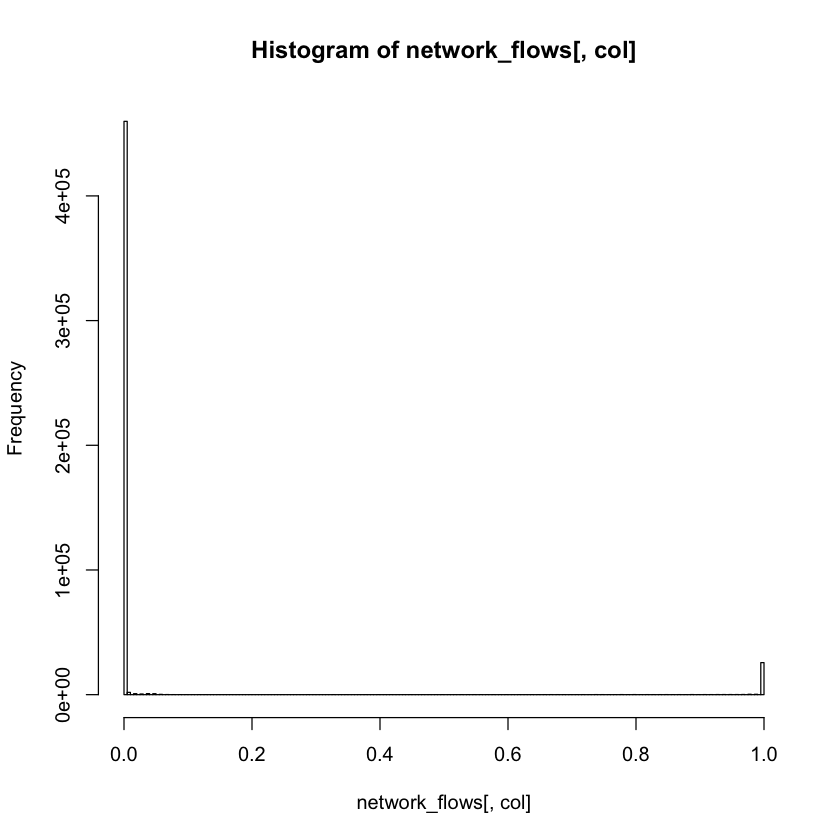

In [27]:
for (col in 2:ncol(network_flows)) {
    if(class(network_flows[,col])=="numeric"){
        hist(network_flows[,col], breaks=200)
            
    }
}

### Barplots for integer data types

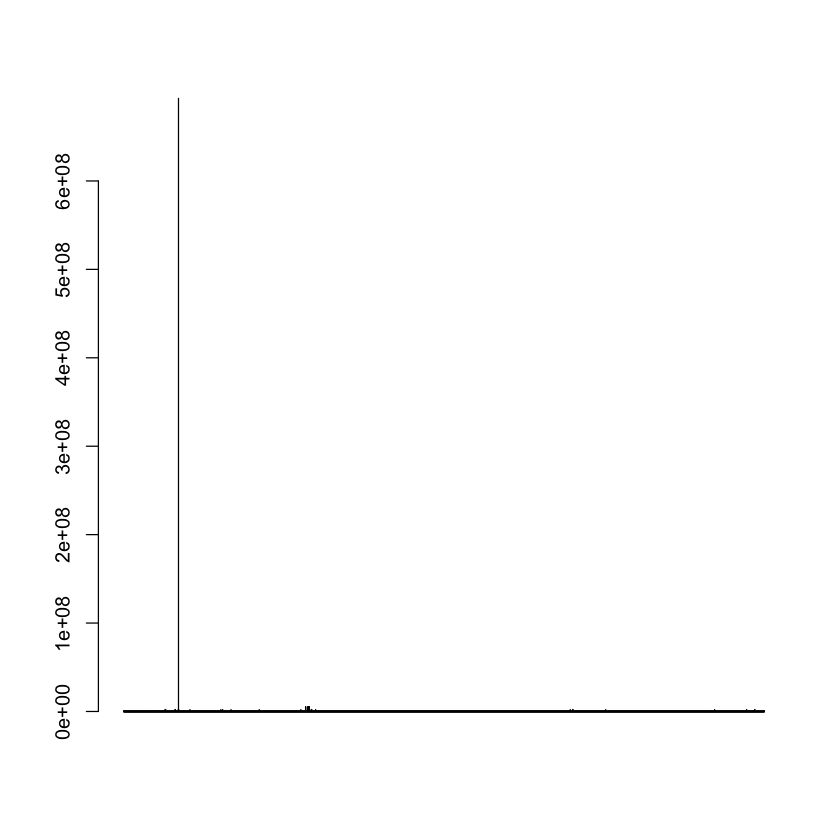

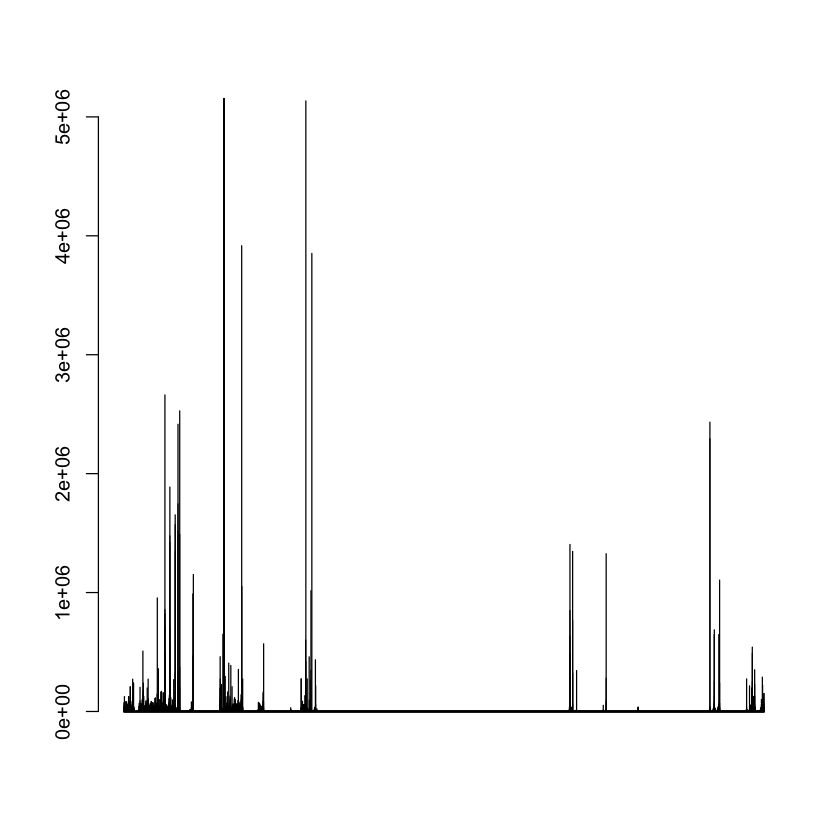

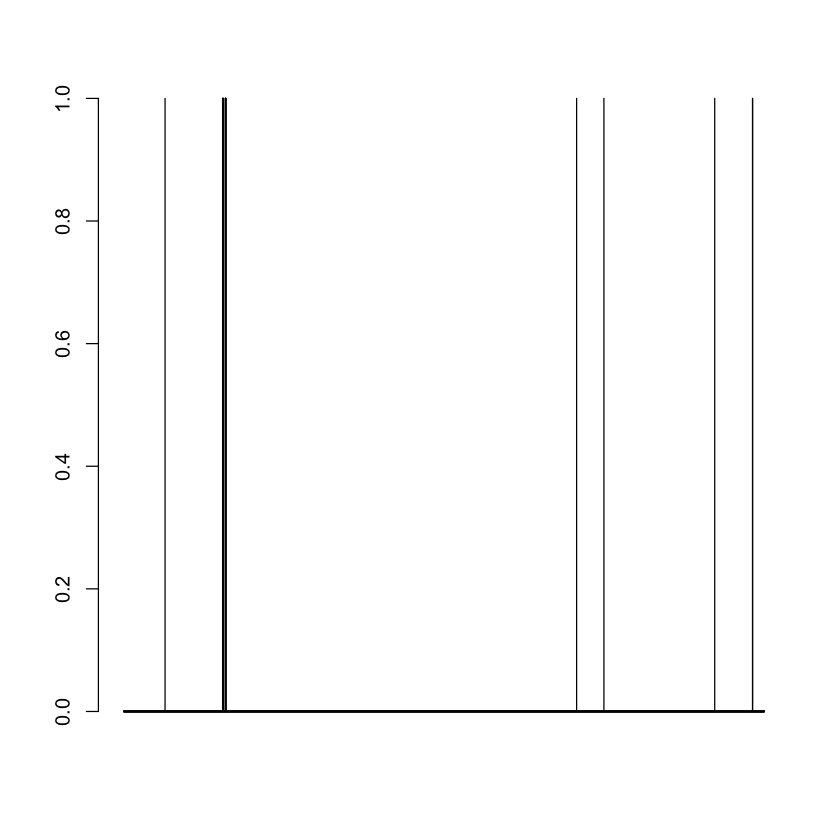

In [13]:
for (col in 2:ncol(network_flows)) {
    if(class(network_flows[,col])=="integer"){
        barplot(network_flows[,col])
            
    }
}

#### Reduce categories if necessary, definitely neceesary for classification or intracategory analysis
Instead of using different dataframes can select multiple rows using filter and use stratified sampleing

In [ ]:
normal <- network_flows[network_flows$label=="normal",]
neptune <- network_flows[network_flows$label=="neptune",]
smurf <- network_flows[network_flows$label=="smurf",]

In [8]:
head(neptune)
neptune <- neptune[sample(nrow(neptune),3),]
# network_flows %>% filter(label == "normal")
#pipe to filter command, many ways for same thing

ERROR: Error in head(neptune): object 'neptune' not found


In [10]:
# plot(neptune, col=normal$serror_rate)

In [11]:
 neptune[sample(nrow(neptune),3),]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
55791,0,tcp,private,S0,0,0,0,0,0,0,...,17,0.07,0.08,0,0,1,1,0,0,neptune
388799,0,tcp,private,S0,0,0,0,0,0,0,...,2,0.01,0.06,0,0,1,1,0,0,neptune
366013,0,tcp,private,S0,0,0,0,0,0,0,...,14,0.05,0.06,0,0,1,1,0,0,neptune
